In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import prody
import os
import matplotlib.pyplot as plt

In [2]:
def summarizeContacts(contacts):
    contact_data =[]
    for pair in contacts:
        atom1,atom2,dist = pair
        ch1 = atom1.getChid()
        ch2 = atom2.getChid()
        res1 = atom1.getResname()
        res2 = atom2.getResname()
        resnum1 = f"{atom1.getResnum()}{atom1.getIcode()}"
        resnum2 = f"{atom2.getResnum()}{atom2.getIcode()}"
        contact_data.append([ch1,res1,resnum1,ch2,res2,resnum2,dist])
    contact_data = pd.DataFrame(contact_data,columns=['ch1','res1','resnum1','ch2','res2','resnum2','dist'])
    #contact_data = contact_data.sort_values(['resnum1','resnum2','dist'],ascending=True).drop_duplicates(['resnum1','resnum2'])
    return contact_data

def epitope_map2(x):
    resnum1 = x.index
    counts = x.values
    start = 319
    end = 541
    positions = np.zeros((end-start+1),int)
    for ind,i in enumerate(resnum1):
        aa = int(i)
        if aa > 541 or aa<319:
            continue
        positions[aa-319]=counts[ind]
    return positions

In [3]:
def Epitope(Ab_atoms,Ag_atoms):
    Epitope_map = np.zeros(541-319+1)
    
    epitope_aa = set()
    for pair in prody.iterNeighbors(Ab_atoms,4,Ag_atoms):
        epitope_aa.add(pair[1].getResnum())
    for aa in epitope_aa:
        if aa > 541 or aa<319:
            continue
        Epitope_map[aa-319] = 1
    return Epitope_map

In [4]:
seq_data = pd.read_excel("SARS2_Abs.xlsx")

In [5]:
ab_VH_contacts_all=[]
ab_VL_contacts_all=[]


for idx,row in seq_data.iterrows():
    pdb = row['pdb']
    name = row['Name']
    VH_chain = row['VH chain']
    VL_chain = row['VL chain']
    Ag_chain = row['RBD chain']
    filename = os.path.join("./Abs",f"{pdb.lower()}.pdb")
    #Ab_chain = f'chain {VH_chain} {VL_chain}'
    VH_chain = f'chain {VH_chain}'
    VL_chain = f'chain {VL_chain}'
    Ag_chain = f'chain {Ag_chain}'
    print(f'{filename}-{VH_chain}-{VL_chain}-{Ag_chain}')
    struct = prody.parsePDB(filename)
    
    VH_struct = struct.select(VH_chain).copy()
    Ag_struct = struct.select(Ag_chain).copy()
    contacts= list(prody.iterNeighbors(Ag_struct,4,VH_struct))
    summarized_contacts = summarizeContacts(contacts)
    summarized_contacts['Name'] = name
    ab_VH_contacts_all.append(summarized_contacts)
    print(f'{name}:{summarized_contacts.shape[0]}')
    
    VL_struct = struct.select(VL_chain).copy()
    contacts= list(prody.iterNeighbors(Ag_struct,4,VL_struct))
    summarized_contacts = summarizeContacts(contacts)
    summarized_contacts['Name'] = name
    ab_VL_contacts_all.append(summarized_contacts)
    print(f'{name}:{summarized_contacts.shape[0]}')
    
ab_VH_contacts = pd.concat(ab_VH_contacts_all)
ab_VL_contacts = pd.concat(ab_VL_contacts_all)

@> 4936 atoms and 1 coordinate set(s) were parsed in 0.06s.


./Abs/6w41.pdb-chain H-chain L-chain C
CR3022:74
CR3022:27
./Abs/6wps.pdb-chain H-chain L-chain A


@> 28116 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 9584 atoms and 1 coordinate set(s) were parsed in 0.10s.


S309:119
S309:27
./Abs/6xc2.pdb-chain H-chain L-chain A
CC12.1:146
CC12.1:93
./Abs/6xc4.pdb-chain H-chain L-chain A


@> 10309 atoms and 1 coordinate set(s) were parsed in 0.11s.


CC12.3:143
CC12.3:31
./Abs/6xcm.pdb-chain H-chain L-chain C


@> 26760 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> Secondary structures were assigned to 1577 residues.
@> 7998 atoms and 1 coordinate set(s) were parsed in 0.11s.


C105:93
C105:32
./Abs/6xdg.pdb-chain B-chain D-chain E
REGN10933:123


@> 7998 atoms and 1 coordinate set(s) were parsed in 0.12s.


REGN10933:5
./Abs/6xdg.pdb-chain C-chain A-chain E
REGN10987:36
REGN10987:0
./Abs/6xe1.pdb-chain H-chain L-chain E


@> 4897 atoms and 1 coordinate set(s) were parsed in 0.06s.


CV30:107
CV30:31
./Abs/6xey.pdb-chain H-chain L-chain A


@> 28482 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> 9239 atoms and 1 coordinate set(s) were parsed in 0.09s.


Fab2-4:69
Fab2-4:16
./Abs/6xkp.pdb-chain H-chain L-chain A
CV07-270:153
CV07-270:6
./Abs/6xkq.pdb-chain H-chain L-chain A


@> 4525 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5839 atoms and 1 coordinate set(s) were parsed in 0.06s.


CV07-250:114
CV07-250:70
./Abs/6zcz.pdb-chain H-chain L-chain E
EY6A:86
EY6A:60
./Abs/7akd.pdb-chain H-chain L-chain B


@> 27358 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 9536 atoms and 1 coordinate set(s) were parsed in 0.10s.


47D11:42
47D11:3
./Abs/7b3o.pdb-chain H-chain L-chain E
STE90-C11:738


@> 5041 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 4883 atoms and 1 coordinate set(s) were parsed in 0.05s.


STE90-C11:442
./Abs/7bei.pdb-chain H-chain L-chain E
COVOX-150:138
COVOX-150:113
./Abs/7bej.pdb-chain H-chain L-chain E


@> 13534 atoms and 1 coordinate set(s) were parsed in 0.16s.


COVOX-158:112
COVOX-158:70
./Abs/7bel.pdb-chain C-chain D-chain X


@> 3318 atoms and 1 coordinate set(s) were parsed in 0.04s.


COVOX-45:109
COVOX-45:46
./Abs/7bem.pdb-chain H-chain L-chain E
COVOX-269:137
COVOX-269:78
./Abs/7ben.pdb-chain H-chain L-chain E


@> 16420 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> 16280 atoms and 1 coordinate set(s) were parsed in 0.16s.


COVOX-253:90
COVOX-253:30
./Abs/7beo.pdb-chain A-chain B-chain R


@> 4820 atoms and 1 coordinate set(s) were parsed in 0.05s.


COVOX-75:69
COVOX-75:48
./Abs/7bwj.pdb-chain H-chain L-chain E
P2B-2F6:54
P2B-2F6:17
./Abs/7byr.pdb-chain H-chain L-chain B


@> 24497 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> 5320 atoms and 1 coordinate set(s) were parsed in 0.05s.


BD23:75
BD23:0
./Abs/7bz5.pdb-chain H-chain L-chain A
B38:219
B38:117
./Abs/7c01.pdb-chain H-chain L-chain A


@> 9670 atoms and 1 coordinate set(s) were parsed in 0.09s.


CB6:123
CB6:38
./Abs/7cai.pdb-chain E-chain D-chain A


@> 31254 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> 4715 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4770 atoms and 1 coordinate set(s) were parsed in 0.05s.


H014:86
H014:45
./Abs/7cdi.pdb-chain H-chain L-chain E
P2C-1F11:107
P2C-1F11:16
./Abs/7cdj.pdb-chain H-chain L-chain E


@> 4729 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4687 atoms and 1 coordinate set(s) were parsed in 0.05s.


P2C-1A3:98
P2C-1A3:35
./Abs/7ch4.pdb-chain H-chain L-chain R
BD-604:108
BD-604:34
./Abs/7ch5.pdb-chain H-chain L-chain R
BD-629:135


@> 4893 atoms and 1 coordinate set(s) were parsed in 0.05s.


BD-629:17
./Abs/7chb.pdb-chain H-chain L-chain R
BD-236:136
BD-236:61
./Abs/7chh.pdb-chain D-chain E-chain A


@> 29029 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> 9551 atoms and 1 coordinate set(s) were parsed in 0.09s.


BD-368-2:69
BD-368-2:4
./Abs/7cho.pdb-chain H-chain L-chain E
P5A-1D2:135
P5A-1D2:19
./Abs/7chp.pdb-chain H-chain L-chain E


@> 5078 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5002 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5398 atoms and 1 coordinate set(s) were parsed in 0.05s.


P5A-3C8:160
P5A-3C8:143
./Abs/7chs.pdb-chain H-chain L-chain E
P22A-1D1:202
P22A-1D1:75
./Abs/7cjf.pdb-chain A-chain B-chain C


@> 4985 atoms and 1 coordinate set(s) were parsed in 0.05s.


P4A1:191
P4A1:115
./Abs/7cm4.pdb-chain H-chain L-chain A
Regdanvimab:139
Regdanvimab:12
./Abs/7cwm.pdb-chain H-chain L-chain A


@> 30760 atoms and 1 coordinate set(s) were parsed in 0.29s.


P17:70
P17:37
./Abs/7cyp.pdb-chain E-chain D-chain A


@> 29979 atoms and 1 coordinate set(s) were parsed in 0.29s.


HB27:70
HB27:25
./Abs/7czp.pdb-chain H-chain L-chain A


@> 30946 atoms and 1 coordinate set(s) were parsed in 0.29s.


P2B-1A1:24
P2B-1A1:101
./Abs/7czq.pdb-chain H-chain K-chain A


@> 31016 atoms and 1 coordinate set(s) were parsed in 0.29s.


P2B-1A10:149
P2B-1A10:71
./Abs/7czt.pdb-chain H-chain L-chain A


@> 31060 atoms and 1 coordinate set(s) were parsed in 0.29s.


P5A-2G9:27
P5A-2G9:67
./Abs/7czu.pdb-chain H-chain K-chain A


@> 31120 atoms and 1 coordinate set(s) were parsed in 0.29s.


P5A-1B6:107
P5A-1B6:26
./Abs/7czw.pdb-chain H-chain L-chain A


@> 31004 atoms and 1 coordinate set(s) were parsed in 0.32s.


P5A-2G7:116
P5A-2G7:19
./Abs/7czx.pdb-chain H-chain K-chain A


@> 34879 atoms and 1 coordinate set(s) were parsed in 0.34s.


P5A-1B9:62
P5A-1B9:29
./Abs/7czy.pdb-chain H-chain K-chain A


@> 31186 atoms and 1 coordinate set(s) were parsed in 0.31s.


P5A-2F11:51
P5A-2F11:9
./Abs/7d00.pdb-chain H-chain K-chain A


@> 30886 atoms and 1 coordinate set(s) were parsed in 0.36s.


P5A-1B8:90
P5A-1B8:29
./Abs/7d0b.pdb-chain H-chain L-chain A


@> 26065 atoms and 1 coordinate set(s) were parsed in 0.25s.


P5A-3C12:33
P5A-3C12:0
./Abs/7d0c.pdb-chain H-chain L-chain A


@> 30966 atoms and 1 coordinate set(s) were parsed in 0.30s.


P5A-3A1:93
P5A-3A1:18
./Abs/7dd2.pdb-chain A-chain B-chain C


@> 31623 atoms and 1 coordinate set(s) were parsed in 0.29s.
@> 3579 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3507 atoms and 1 coordinate set(s) were parsed in 0.04s.


3C1:43
3C1:87
./Abs/7deo.pdb-chain H-chain L-chain B
PR1077:119
PR1077:12
./Abs/7det.pdb-chain H-chain L-chain A
PR961:95
PR961:69
./Abs/7deu.pdb-chain H-chain L-chain A


@> 3409 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 5188 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4786 atoms and 1 coordinate set(s) were parsed in 0.05s.


PR953:105
PR953:45
./Abs/7djz.pdb-chain A-chain B-chain C
MW01:116
MW01:74
./Abs/7dk0.pdb-chain A-chain B-chain C
MW05:127
MW05:28
./Abs/7dk5.pdb-chain a-chain b-chain A


@> 28144 atoms and 1 coordinate set(s) were parsed in 0.30s.


2H2:90
2H2:124
./Abs/7dpm.pdb-chain A-chain B-chain C


@> 19571 atoms and 1 coordinate set(s) were parsed in 0.20s.
@> 3133 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 9297 atoms and 1 coordinate set(s) were parsed in 0.10s.


MW06:98
MW06:27
./Abs/7e23.pdb-chain B-chain C-chain A
CA521:113
CA521:0
./Abs/7e5y.pdb-chain H-chain L-chain R


@> 9916 atoms and 1 coordinate set(s) were parsed in 0.10s.


2B11:126
2B11:33
./Abs/7e7y.pdb-chain A-chain B-chain R
BD-623:138
BD-623:28
./Abs/7e86.pdb-chain A-chain B-chain C


@> 4698 atoms and 1 coordinate set(s) were parsed in 0.05s.


BD-508:120
BD-508:61
./Abs/7e88.pdb-chain A-chain B-chain C


@> 18863 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 11084 atoms and 1 coordinate set(s) were parsed in 0.11s.


BD-515:107
BD-515:38
./Abs/7eam.pdb-chain H-chain L-chain A
7D6:137


@> 9677 atoms and 1 coordinate set(s) were parsed in 0.09s.


7D6:27
./Abs/7ean.pdb-chain H-chain L-chain A
6D6:570


@> 3321 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3375 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 4904 atoms and 1 coordinate set(s) were parsed in 0.05s.


6D6:297
./Abs/7f62.pdb-chain H-chain L-chain A
RBD-chAb-25:26
RBD-chAb-25:58
./Abs/7f63.pdb-chain H-chain L-chain A
RBD-chAb-45:59
RBD-chAb-45:21
./Abs/7jmo.pdb-chain H-chain L-chain A


@> 4907 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4873 atoms and 1 coordinate set(s) were parsed in 0.05s.


COVA2-04:178
COVA2-04:56
./Abs/7jmp.pdb-chain H-chain L-chain A
COVA2-39:176
COVA2-39:33
./Abs/7jmw.pdb-chain H-chain L-chain A


@> 2151 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3248 atoms and 1 coordinate set(s) were parsed in 0.03s.


COVA1-16:106
COVA1-16:15
./Abs/7jv2.pdb-chain H-chain L-chain A
S2H13:52
S2H13:48
./Abs/7jva.pdb-chain H-chain L-chain A
S2A4:52
S2A4:46
./Abs/7jw0.pdb-chain H-chain L-chain A


@> 26251 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 11518 atoms and 1 coordinate set(s) were parsed in 0.12s.


S304:1
S304:16
./Abs/7jx3.pdb-chain C-chain D-chain R
S2H14:92
S2H14:54
./Abs/7k43.pdb-chain H-chain L-chain A


@> 30390 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> 3038 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 4730 atoms and 1 coordinate set(s) were parsed in 0.05s.


S2-M11:93
S2-M11:3
./Abs/7k45.pdb-chain H-chain L-chain B
S2-E12:43
S2-E12:12
./Abs/7k8m.pdb-chain A-chain B-chain E
C102:126
C102:22
./Abs/7k8v.pdb-chain H-chain L-chain A


@> 26248 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> Secondary structures were assigned to 1708 residues.


C110:20
C110:28
./Abs/7k8z.pdb-chain H-chain L-chain A


@> 26015 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> Secondary structures were assigned to 1915 residues.


C135:35
C135:29
./Abs/7k8s.pdb-chain H-chain L-chain A


@> 29649 atoms and 1 coordinate set(s) were parsed in 0.29s.


C002:59
C002:17
./Abs/7k8w.pdb-chain H-chain L-chain A


@> 26487 atoms and 1 coordinate set(s) were parsed in 0.26s.


C119:63
C119:20
./Abs/7k8x.pdb-chain E-chain G-chain A


@> 27399 atoms and 1 coordinate set(s) were parsed in 0.26s.


C121:61
C121:5
./Abs/7k90.pdb-chain H-chain L-chain B


@> 28863 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 8055 atoms and 1 coordinate set(s) were parsed in 0.07s.


C144:100
C144:9
./Abs/7k9z.pdb-chain H-chain L-chain E
Fab-52:72
Fab-52:28
./Abs/7k9z.pdb-chain B-chain A-chain E


@> 8055 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 16121 atoms and 1 coordinate set(s) were parsed in 0.15s.


Fab-298:35
Fab-298:38
./Abs/7kfv.pdb-chain H-chain L-chain A


@> 14854 atoms and 1 coordinate set(s) were parsed in 0.15s.


C1A-B3:228
C1A-B3:106
./Abs/7kfw.pdb-chain H-chain L-chain A


@> 5191 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5382 atoms and 1 coordinate set(s) were parsed in 0.05s.


C1A-B12:168
C1A-B12:70
./Abs/7kfx.pdb-chain H-chain L-chain A
C1A-C2:198
C1A-C2:50
./Abs/7kfy.pdb-chain H-chain L-chain A


@> 9569 atoms and 1 coordinate set(s) were parsed in 0.09s.


C1A-F10:228
C1A-F10:83
./Abs/7kmg.pdb-chain D-chain E-chain F
Bamlanivimab:76
Bamlanivimab:43
./Abs/7kmh.pdb-chain A-chain B-chain C


@> 4910 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5278 atoms and 1 coordinate set(s) were parsed in 0.05s.


LY-CoV488:185
LY-CoV488:86
./Abs/7kmi.pdb-chain A-chain B-chain C
LY-CoV481:171
LY-CoV481:128
./Abs/7ks9.pdb-chain H-chain L-chain B


@> 25355 atoms and 1 coordinate set(s) were parsed in 0.24s.


910-30:103
910-30:76
./Abs/7kxj.pdb-chain H-chain L-chain A


@> 34083 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 7102 atoms and 1 coordinate set(s) were parsed in 0.07s.


Fab_15033-7:57
Fab_15033-7:53
./Abs/7kzb_1.pdb-chain H-chain L-chain C
CR3014-C8:36
CR3014-C8:76
./Abs/7kzb_2.pdb-chain A-chain B-chain C


@> 7102 atoms and 1 coordinate set(s) were parsed in 0.07s.


CR3022-B6:12
CR3022-B6:67
./Abs/7l56.pdb-chain H-chain L-chain A


@> 26583 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 18103 atoms and 1 coordinate set(s) were parsed in 0.17s.


Fab2-43:55
Fab2-43:21
./Abs/7l58.pdb-chain H-chain L-chain B


@> 4569 atoms and 1 coordinate set(s) were parsed in 0.04s.


H4:0
H4:0
./Abs/7l5b.pdb-chain H-chain L-chain A
Fab2-15:72
Fab2-15:37
./Abs/7laa.pdb-chain H-chain L-chain A


@> 46691 atoms and 1 coordinate set(s) were parsed in 0.43s.


DH1041:588
DH1041:56
./Abs/7ld1.pdb-chain H-chain L-chain B


@> 29456 atoms and 1 coordinate set(s) were parsed in 0.27s.


DH1047:52
DH1047:9
./Abs/7ljr.pdb-chain S-chain T-chain A


@> 26291 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 5541 atoms and 1 coordinate set(s) were parsed in 0.05s.


DH1043:114
DH1043:74
./Abs/7lm9.pdb-chain H-chain L-chain A
CV38-142:145
CV38-142:36
./Abs/7lop.pdb-chain H-chain L-chain A


@> 17650 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> 4912 atoms and 1 coordinate set(s) were parsed in 0.05s.


CV05-163:92
CV05-163:91
./Abs/7lrs.pdb-chain D-chain E-chain C
A23-58-1:24
A23-58-1:0
./Abs/7ls9.pdb-chain H-chain L-chain A


@> 32226 atoms and 1 coordinate set(s) were parsed in 0.30s.


Fab1-57:78
Fab1-57:26
./Abs/7lss.pdb-chain H-chain L-chain B


@> 20582 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 9856 atoms and 1 coordinate set(s) were parsed in 0.09s.


Fab2-7:47
Fab2-7:36
./Abs/7m3i.pdb-chain H-chain L-chain R
CV2-75:66
CV2-75:60
./Abs/7m6d.pdb-chain H-chain L-chain C


@> 8221 atoms and 1 coordinate set(s) were parsed in 0.08s.


BG4-25:108
BG4-25:19
./Abs/7m6e.pdb-chain H-chain L-chain A


@> 29796 atoms and 1 coordinate set(s) were parsed in 0.27s.


BG10-19:140
BG10-19:4
./Abs/7m6f.pdb-chain H-chain L-chain A


@> 24256 atoms and 1 coordinate set(s) were parsed in 0.22s.


BG1-22:43
BG1-22:5
./Abs/7m6g.pdb-chain H-chain L-chain C


@> 26290 atoms and 1 coordinate set(s) were parsed in 0.25s.


BG7-15:80
BG7-15:17
./Abs/7m6h.pdb-chain D-chain F-chain B


@> 27379 atoms and 1 coordinate set(s) were parsed in 0.26s.


BG7-20:93
BG7-20:14
./Abs/7m6i.pdb-chain H-chain L-chain C


@> 27359 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 6646 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 4898 atoms and 1 coordinate set(s) were parsed in 0.05s.


BG1-24:94
BG1-24:28
./Abs/7m71.pdb-chain H-chain L-chain A
Asarnow_5A6:70
Asarnow_5A6:39
./Abs/7m7b.pdb-chain H-chain L-chain A


@> 16275 atoms and 1 coordinate set(s) were parsed in 0.15s.


Asarnow_3D11:41
Asarnow_3D11:57
./Abs/7m7w.pdb-chain C-chain D-chain S


@> 4972 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4788 atoms and 1 coordinate set(s) were parsed in 0.05s.


S2H97:90
S2H97:25
./Abs/7mf1.pdb-chain H-chain L-chain A
Zhou_47D1:139
Zhou_47D1:0
./Abs/7mjl.pdb-chain H-chain L-chain A


@> 3192 atoms and 1 coordinate set(s) were parsed in 0.04s.


ab1:116
ab1:23
./Abs/7mkm.pdb-chain H-chain L-chain A
SARS2-38:6
SARS2-38:32
./Abs/7mmo.pdb-chain D-chain E-chain F


@> 9116 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 5244 atoms and 1 coordinate set(s) were parsed in 0.05s.


LY-CoV1404:44
LY-CoV1404:60
./Abs/7n3i.pdb-chain H-chain L-chain C
C098:211
C098:100
./Abs/7n64.pdb-chain H-chain L-chain B


@> 7189 atoms and 1 coordinate set(s) were parsed in 0.07s.


G32R7:73
G32R7:0
./Abs/7nd4.pdb-chain H-chain L-chain C


@> 29848 atoms and 1 coordinate set(s) were parsed in 0.28s.


COVOX-88:58
COVOX-88:41
./Abs/7nd6.pdb-chain H-chain L-chain B


@> 26732 atoms and 1 coordinate set(s) were parsed in 0.33s.


COVOX-40:98
COVOX-40:68
./Abs/7nd7.pdb-chain H-chain L-chain A


@> 29591 atoms and 1 coordinate set(s) were parsed in 0.30s.


COVOX-316:84
COVOX-316:27
./Abs/7nd8.pdb-chain H-chain L-chain B


@> 27659 atoms and 1 coordinate set(s) were parsed in 0.27s.


COVOX-384:57
COVOX-384:21
./Abs/7nda.pdb-chain H-chain L-chain C


@> 27721 atoms and 1 coordinate set(s) were parsed in 0.30s.


COVOX-253H55L:69
COVOX-253H55L:1
./Abs/7ndb.pdb-chain H-chain L-chain B


@> 27184 atoms and 1 coordinate set(s) were parsed in 0.27s.


COVOX-253H165L:13
COVOX-253H165L:4
./Abs/7ndc.pdb-chain H-chain L-chain B


@> 30645 atoms and 1 coordinate set(s) were parsed in 0.31s.
@> 8384 atoms and 1 coordinate set(s) were parsed in 0.08s.


COVOX-159:38
COVOX-159:3
./Abs/7nx6.pdb-chain A-chain B-chain E
COVOX-222:189
COVOX-222:95
./Abs/7or9.pdb-chain H-chain L-chain E


@> 8248 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 8911 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 2790 atoms and 1 coordinate set(s) were parsed in 0.03s.


COVOX-278:39
COVOX-278:82
./Abs/7r6w.pdb-chain H-chain L-chain R
S2X35:197
S2X35:78
./Abs/7r7n.pdb-chain H-chain L-chain E


@> 8251 atoms and 1 coordinate set(s) were parsed in 0.08s.


S2D106:41
S2D106:38
./Abs/7r8l.pdb-chain H-chain L-chain E
C099:135
C099:39
./Abs/7r8m.pdb-chain H-chain L-chain B


@> 26323 atoms and 1 coordinate set(s) were parsed in 0.25s.


C032:82
C032:36
./Abs/7r8n.pdb-chain H-chain L-chain A


@> 29719 atoms and 1 coordinate set(s) were parsed in 0.30s.


C051:162
C051:11
./Abs/7r8o.pdb-chain H-chain L-chain B


@> 29952 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 2847 atoms and 1 coordinate set(s) were parsed in 0.03s.


C548:48
C548:41
./Abs/7ral.pdb-chain H-chain L-chain B
S2X259:95
S2X259:34


In [6]:
VH_epitopes_info = ab_VH_contacts.groupby("Name").apply(lambda x: epitope_map2(x.groupby("resnum1")['resnum2'].count()))
names = np.array(VH_epitopes_info.index)
matrics = VH_epitopes_info.values
Ab_VH_epitopes = pd.DataFrame(np.vstack(matrics),columns=np.arange(319,542),index=names)

VL_epitopes_info = ab_VL_contacts.groupby("Name").apply(lambda x: epitope_map2(x.groupby("resnum1")['resnum2'].count()))
names = np.array(VL_epitopes_info.index)
matrics = VL_epitopes_info.values
Ab_VL_epitopes = pd.DataFrame(np.vstack(matrics),columns=np.arange(319,542),index=names)

In [7]:
Ab_epitopes =pd.concat([Ab_VH_epitopes,Ab_VL_epitopes]).reset_index().groupby("index").sum()

In [50]:
Ab_epitopes.to_csv("Ab_map_#atom.csv")
Ab_epitopes.to_csv("Ab_map_#atom.csv")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 2, 0, 1, 5,
       0, 0, 3, 2, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

<AxesSubplot:>

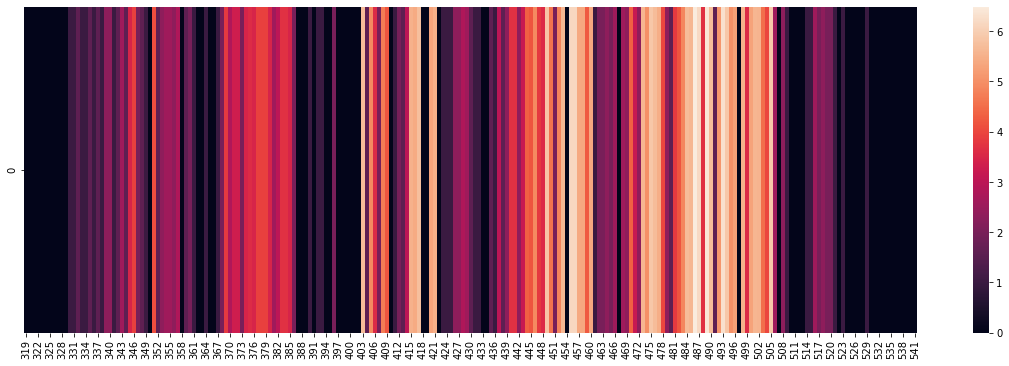

In [27]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.DataFrame(Ab_epitopes.astype(bool).astype(int).sum()).T.apply(lambda x: np.log2(x+1)))

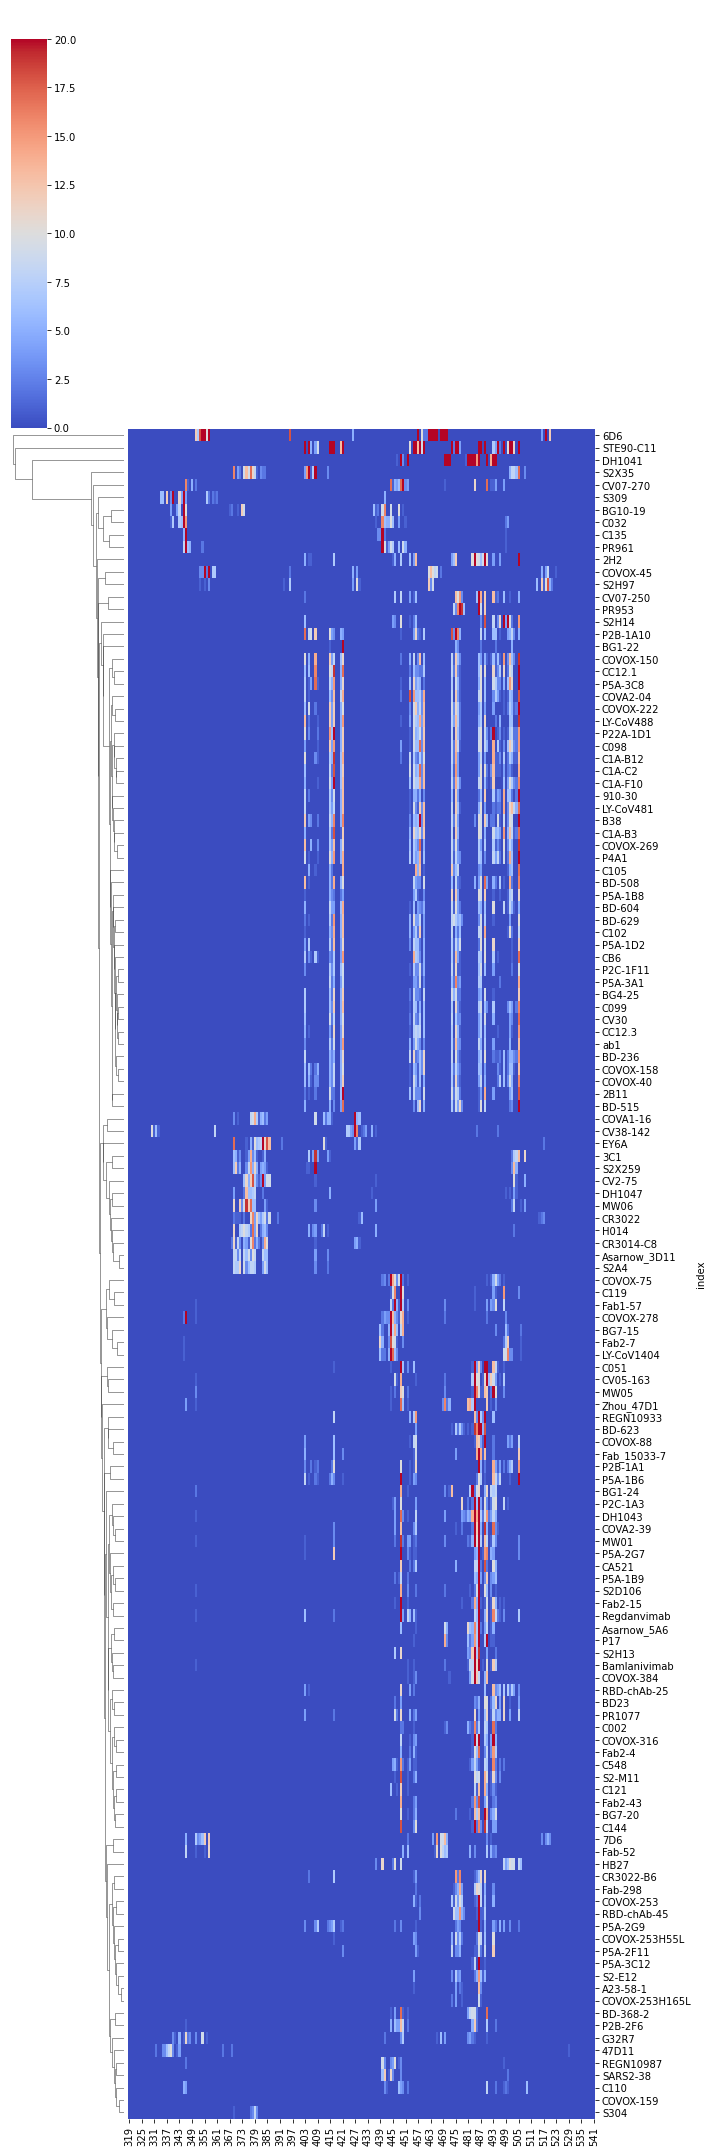

In [40]:
sns.clustermap(pd.DataFrame(Ab_epitopes),vmax=20,col_cluster=False,cmap='coolwarm',yticklabels=True,figsize=(10,30))
plt.savefig('Abs_RBD.pdf',format='pdf')

In [4]:
epitopes = []
pdbs=[]
names=[]
for idx,row in seq_data.iterrows():
    pdb = row['pdb']
    name = row['Name']
    for pdb_i in pdb.split(";"):
        filename = os.path.join("./Abs",f"{pdb_i.lower()}.pdb")
        if not os.path.exists(filename):
            print(f"{pdb_i} does not exist, next")
            continue
        f_txt = open(filename)
        annotation=""
        while(True):
            annotation = next(f_txt)
            if "HCHAIN" in annotation:
                annotations = annotation.split(" ")
                break
        Ab_chains=set()
        Ag_chain=""
        for item in annotations:
            if item.startswith("HCHAIN") or item.startswith("LCHAIN"):
                chid = item.split("=")[1]
                if chid!="NONE":
                    Ab_chains.add(chid)
            if item.startswith("AGCHAIN"):
                chid = item.split("=")[1]
                if chid!="NONE":
                    Ag_chain = chid.replace(";"," ")
        if len(Ab_chains)==0 or Ag_chain=="":
            continue
        Ab_chains = f'chain {" ".join(Ab_chains)}'
        Ag_chain = f'chain {Ag_chain}'
        print(f'{filename}-{Ab_chains}-{Ag_chain}')
        struct = prody.parsePDB(filename)
        Ab_struct = struct.select(Ab_chains).copy()
        Ag_struct = struct.select(Ag_chain).copy()
        epitope_map = Epitope(Ab_struct,Ag_struct)
        epitopes.append(epitope_map)
        pdbs.append(pdb_i)
        names.append(name)
        break

@> 7189 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7n64.pdb-chain H L-chain B A
./Abs/7r7n.pdb-chain H L-chain E


@> 2790 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 8248 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 3375 atoms and 1 coordinate set(s) were parsed in 0.03s.


./Abs/7or9.pdb-chain B A-chain E
./Abs/7f63.pdb-chain H L-chain A


@> 3321 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 9297 atoms and 1 coordinate set(s) were parsed in 0.09s.


./Abs/7f62.pdb-chain H L-chain A
./Abs/7e5y.pdb-chain H L-chain R


@> 9916 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 4786 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7e7y.pdb-chain B A-chain R
./Abs/7dk0.pdb-chain B A-chain C


@> 5188 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4898 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7djz.pdb-chain B A-chain C
./Abs/7m7b.pdb-chain H L-chain A


@> 6646 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 5002 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7m71.pdb-chain H L-chain A B
./Abs/7chs.pdb-chain H L-chain E


@> 5078 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 9551 atoms and 1 coordinate set(s) were parsed in 0.08s.


./Abs/7chp.pdb-chain H L-chain E
./Abs/7cho.pdb-chain H L-chain E


@> 9856 atoms and 1 coordinate set(s) were parsed in 0.09s.


./Abs/7m3i.pdb-chain B A-chain C
./Abs/7mmo.pdb-chain B A-chain C


@> 9116 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 3192 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 4972 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3133 atoms and 1 coordinate set(s) were parsed in 0.03s.


./Abs/7mkm.pdb-chain H L-chain A
./Abs/7mf1.pdb-chain H L-chain A
./Abs/7e23.pdb-chain C B-chain A
./Abs/7m6i.pdb-chain H L-chain C B


@> 27359 atoms and 1 coordinate set(s) were parsed in 0.23s.


./Abs/7m6h.pdb-chain F D-chain B C


@> 27379 atoms and 1 coordinate set(s) were parsed in 0.22s.


./Abs/7m6g.pdb-chain H L-chain C A


@> 26290 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> 24256 atoms and 1 coordinate set(s) were parsed in 0.20s.


./Abs/7m6f.pdb-chain C D-chain E
./Abs/7m6e.pdb-chain C D-chain E


@> 29796 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 8221 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7m6d.pdb-chain B A-chain C
./Abs/7m7w.pdb-chain B A-chain S


@> 16275 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 2847 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 8384 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7ral.pdb-chain H L-chain B
./Abs/7nx6.pdb-chain H L-chain E


@> 3560 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 6998 atoms and 1 coordinate set(s) were parsed in 0.06s.


./Abs/7deu.pdb-chain B-chain A
./Abs/7det.pdb-chain B-chain A


@> 7104 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 9677 atoms and 1 coordinate set(s) were parsed in 0.08s.


./Abs/7deo.pdb-chain A-chain B
./Abs/7ean.pdb-chain H L-chain A


@> 11084 atoms and 1 coordinate set(s) were parsed in 0.09s.


./Abs/7eam.pdb-chain H L-chain A
./Abs/7r8n.pdb-chain H L-chain A


@> 29719 atoms and 1 coordinate set(s) were parsed in 0.26s.


./Abs/7r8o.pdb-chain H L-chain B


@> 29952 atoms and 1 coordinate set(s) were parsed in 0.29s.


./Abs/7r8m.pdb-chain E D-chain C


@> 26323 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 5244 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 8251 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7n3i.pdb-chain H L-chain C
./Abs/7r8l.pdb-chain H L-chain E


@> 5041 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4883 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7bei.pdb-chain H L-chain E
./Abs/7bej.pdb-chain H L-chain E


@> 13534 atoms and 1 coordinate set(s) were parsed in 0.12s.


./Abs/7bel.pdb-chain B A-chain R
./Abs/7nd4.pdb-chain H L-chain C


@> 29848 atoms and 1 coordinate set(s) were parsed in 0.27s.


./Abs/7nda.pdb-chain H L-chain C A


@> 27721 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 16280 atoms and 1 coordinate set(s) were parsed in 0.14s.


./Abs/7beo.pdb-chain B A-chain R
./Abs/7nd8.pdb-chain H L-chain B


@> 27659 atoms and 1 coordinate set(s) were parsed in 0.25s.


./Abs/7nd7.pdb-chain H L-chain A


@> 29591 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 16420 atoms and 1 coordinate set(s) were parsed in 0.14s.


./Abs/7ben.pdb-chain H L-chain E
./Abs/7bem.pdb-chain H L-chain E


@> 3318 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7nd6.pdb-chain H L-chain B


@> 26732 atoms and 1 coordinate set(s) were parsed in 0.24s.


./Abs/7ndb.pdb-chain H L-chain B


@> 27184 atoms and 1 coordinate set(s) were parsed in 0.25s.


./Abs/7ndc.pdb-chain E D-chain C


@> 30645 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 4912 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7lrs.pdb-chain E D-chain C
./Abs/7dpm.pdb-chain B A-chain C


@> 19571 atoms and 1 coordinate set(s) were parsed in 0.18s.


./Abs/7kxj.pdb-chain H L-chain A


@> 34083 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> 5278 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4910 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7kmi.pdb-chain B A-chain C
./Abs/7kmh.pdb-chain B A-chain C


@> 6915 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 4788 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7m8j.pdb-chain H L-chain A
./Abs/7mjl.pdb-chain H L-chain A
./Abs/7ks9.pdb-chain H L-chain B


@> 25355 atoms and 1 coordinate set(s) were parsed in 0.21s.


./Abs/7ljr.pdb-chain T S-chain A


@> 26291 atoms and 1 coordinate set(s) were parsed in 0.22s.


./Abs/7laa.pdb-chain H L-chain A


@> 46691 atoms and 1 coordinate set(s) were parsed in 0.38s.


./Abs/7ld1.pdb-chain M N-chain C


@> 29456 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> 7102 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 7102 atoms and 1 coordinate set(s) were parsed in 0.06s.


./Abs/7kzb_1.pdb-chain H L-chain C
./Abs/7kzb_2.pdb-chain B A-chain C


@> 9536 atoms and 1 coordinate set(s) were parsed in 0.08s.


./Abs/7b3o.pdb-chain H L-chain E
./Abs/7cwm.pdb-chain G J-chain B


@> 30760 atoms and 1 coordinate set(s) were parsed in 0.26s.


./Abs/7dd2.pdb-chain E H-chain K


@> 31623 atoms and 1 coordinate set(s) were parsed in 0.26s.


./Abs/7dk5.pdb-chain a b-chain A


@> 28144 atoms and 1 coordinate set(s) were parsed in 0.22s.


./Abs/7cyp.pdb-chain E D-chain A


@> 29979 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 4770 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 4715 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7cdj.pdb-chain H L-chain E
./Abs/7cdi.pdb-chain H L-chain E
./Abs/7kfv.pdb-chain C D-chain B


@> 16121 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 14854 atoms and 1 coordinate set(s) were parsed in 0.12s.


./Abs/7kfw.pdb-chain C D-chain B
./Abs/7kfx.pdb-chain H L-chain A


@> 5191 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 5382 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5398 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7kfy.pdb-chain H L-chain A
./Abs/7cjf.pdb-chain B A-chain C


@> 3038 atoms and 1 coordinate set(s) were parsed in 0.03s.


./Abs/7k45.pdb-chain H L-chain B
./Abs/7k43.pdb-chain H L-chain A


@> 30390 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 9569 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 4985 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7kmg.pdb-chain B A-chain C
./Abs/7cm4.pdb-chain H L-chain A


@> 8055 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7k9z.pdb-chain H L-chain E
./Abs/7k9z.pdb-chain H L-chain E


@> 8055 atoms and 1 coordinate set(s) were parsed in 0.07s.


./Abs/7czp.pdb-chain H L-chain A


@> 30946 atoms and 1 coordinate set(s) were parsed in 0.28s.


./Abs/7czq.pdb-chain H K-chain A


@> 31016 atoms and 1 coordinate set(s) were parsed in 0.28s.


./Abs/7d0c.pdb-chain H L-chain A


@> 30966 atoms and 1 coordinate set(s) were parsed in 0.25s.


./Abs/7d00.pdb-chain H K-chain A


@> 30886 atoms and 1 coordinate set(s) were parsed in 0.26s.


./Abs/7czt.pdb-chain H L-chain A


@> 31060 atoms and 1 coordinate set(s) were parsed in 0.27s.


./Abs/7czu.pdb-chain N J-chain C


@> 31120 atoms and 1 coordinate set(s) were parsed in 0.29s.


./Abs/7czw.pdb-chain H L-chain A


@> 31004 atoms and 1 coordinate set(s) were parsed in 0.29s.


./Abs/7czx.pdb-chain H K-chain A


@> 34879 atoms and 1 coordinate set(s) were parsed in 0.31s.


./Abs/7czy.pdb-chain H K-chain A


@> 31186 atoms and 1 coordinate set(s) were parsed in 0.27s.


./Abs/7d0b.pdb-chain H L-chain A


@> 26065 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 11518 atoms and 1 coordinate set(s) were parsed in 0.10s.
@> 2151 atoms and 1 coordinate set(s) were parsed in 0.02s.


./Abs/7jx3.pdb-chain B A-chain R
./Abs/7jv2.pdb-chain H L-chain A


@> 8911 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 3248 atoms and 1 coordinate set(s) were parsed in 0.03s.


./Abs/7r6w.pdb-chain H L-chain R
./Abs/7jva.pdb-chain H L-chain A


@> 17650 atoms and 1 coordinate set(s) were parsed in 0.16s.


./Abs/7lop.pdb-chain W V-chain Z


@> 4525 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 9239 atoms and 1 coordinate set(s) were parsed in 0.09s.


./Abs/6xkq.pdb-chain H L-chain A
./Abs/6xkp.pdb-chain H L-chain A


@> 5541 atoms and 1 coordinate set(s) were parsed in 0.06s.


./Abs/7lm9.pdb-chain H L-chain A
./Abs/7cai.pdb-chain E D-chain A


@> 31254 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> 4893 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7chb.pdb-chain H L-chain R
./Abs/7chh.pdb-chain E D-chain A


@> 29029 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 4729 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4687 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7ch4.pdb-chain H L-chain R
./Abs/7ch5.pdb-chain H L-chain R


@> 7998 atoms and 1 coordinate set(s) were parsed in 0.08s.


./Abs/6xdg.pdb-chain B D-chain E
./Abs/6xdg.pdb-chain B D-chain E


@> 7998 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 9670 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 5839 atoms and 1 coordinate set(s) were parsed in 0.06s.


./Abs/7c01.pdb-chain H L-chain A
./Abs/6zcz.pdb-chain H L-chain E
./Abs/7ls9.pdb-chain H L-chain A


@> 32226 atoms and 1 coordinate set(s) were parsed in 0.31s.


./Abs/6xey.pdb-chain G F-chain B


@> 28482 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 20582 atoms and 1 coordinate set(s) were parsed in 0.19s.


./Abs/7lss.pdb-chain H L-chain B


@> 4569 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7l5b.pdb-chain H L-chain A
./Abs/7l56.pdb-chain G F-chain C


@> 26583 atoms and 1 coordinate set(s) were parsed in 0.23s.


./Abs/7byr.pdb-chain H L-chain B


@> 24497 atoms and 1 coordinate set(s) were parsed in 0.22s.
@> 4698 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7e86.pdb-chain B A-chain C
./Abs/7e88.pdb-chain B A-chain C


@> 18863 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> 4820 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4873 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7bwj.pdb-chain H L-chain E
./Abs/7jmw.pdb-chain H L-chain A


@> 4904 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4907 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/7jmo.pdb-chain H L-chain A
./Abs/7jmp.pdb-chain H L-chain A
./Abs/7k8s.pdb-chain H L-chain A


@> 29649 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> 4730 atoms and 1 coordinate set(s) were parsed in 0.04s.


./Abs/7k8m.pdb-chain B A-chain E
./Abs/7k8w.pdb-chain H L-chain A


@> 26487 atoms and 1 coordinate set(s) were parsed in 0.24s.


./Abs/7k8x.pdb-chain F D-chain B C


@> 27399 atoms and 1 coordinate set(s) were parsed in 0.24s.


./Abs/7k90.pdb-chain H L-chain B


@> 28863 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> 9584 atoms and 1 coordinate set(s) were parsed in 0.09s.


./Abs/6xc2.pdb-chain H L-chain A
./Abs/6xc4.pdb-chain H L-chain A


@> 10309 atoms and 1 coordinate set(s) were parsed in 0.10s.
@> 4897 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 5320 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/6xe1.pdb-chain H L-chain E
./Abs/7bz5.pdb-chain H L-chain A


@> 18103 atoms and 1 coordinate set(s) were parsed in 0.16s.


./Abs/7l58.pdb-chain H L-chain B


@> 4936 atoms and 1 coordinate set(s) were parsed in 0.05s.


./Abs/6w41.pdb-chain H L-chain C
./Abs/7akd.pdb-chain E D-chain C


@> 27358 atoms and 1 coordinate set(s) were parsed in 0.25s.


./Abs/7jw0.pdb-chain H L-chain A


@> 26251 atoms and 1 coordinate set(s) were parsed in 0.23s.


./Abs/6wps.pdb-chain H L-chain A


@> 28116 atoms and 1 coordinate set(s) were parsed in 0.24s.


In [53]:
epitopes_arr = np.array(epitopes)
epitopes_arr = pd.DataFrame(epitopes,index=names,columns=np.arange(319,542))
epitope_info = pd.DataFrame(pdbs,index=names)

NameError: name 'epitopes' is not defined

In [23]:
epitopes_arr = epitopes_arr[epitopes_arr.sum(1)!=0].copy()

In [16]:
Ab_epitopes[np.arange(333,370)]

,333,334,335,336,337,338,339,340,341,342,...,360,361,362,363,364,365,366,367,368,369
index,,,,,,,,,,,,,,,,,,,,,
2B11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2H2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3C1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
47D11,0,0,2,2,3,3,3,3,0,1,...,0,0,0,0,1,0,0,0,1,0
6D6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S309,0,1,3,0,2,0,1,5,0,0,...,1,1,0,0,0,0,0,0,0,0
SARS2-38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STE90-C11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/zhesang/opt/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


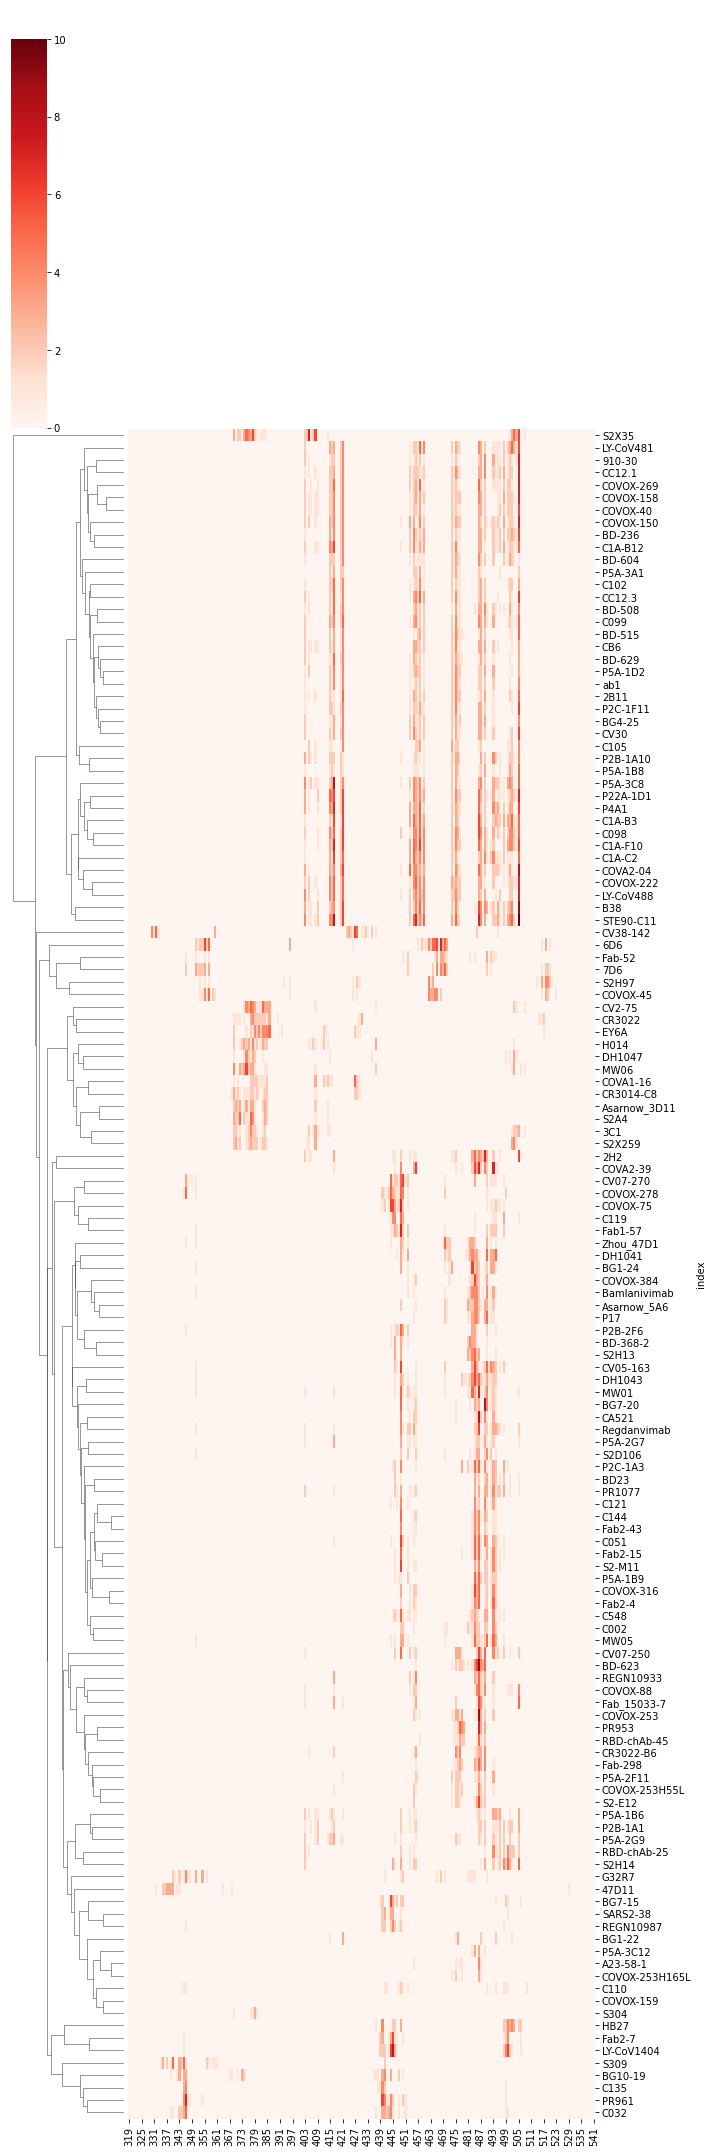

In [17]:
sns.clustermap(Ab_epitopes.sort_values(list(np.arange(333,370))),cmap='Reds',yticklabels=True,col_cluster=False,figsize=(10,30))